Step 0: Imports and Reading Data

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [ ]:
ticker1 = 'NVDA'
ticker2 = 'AMD'
start_date = '2020-01-01'
end_date = '2025-07-10'

print(f"Descargando datos para {ticker1} desde {start_date} hasta {end_date}...")
print(f"Descargando datos para {ticker2} desde {start_date} hasta {end_date}...")

# La función yf.download() hace todo el trabajo por nosotros.
# El resultado es un DataFrame de Pandas, que es la estructura de datos estándar para este tipo de análisis.
data = yf.download([ticker1, ticker2], start=start_date, end=end_date)

Step 1: Data Understanding

In [33]:
data.shape

(1386, 10)

In [34]:
data.head(10)

Price           Close                 High                  Low            \
Ticker            AMD      NVDA        AMD      NVDA        AMD      NVDA   
Date                                                                        
2020-01-02  49.099998  5.971746  49.250000  5.971746  46.630001  5.892342   
2020-01-03  48.599998  5.876164  49.389999  5.919973  47.540001  5.827127   
2020-01-06  48.389999  5.900805  48.860001  5.906033  47.860001  5.756683   
2020-01-07  48.250000  5.972243  49.389999  6.018044  48.040001  5.884127   
2020-01-08  47.830002  5.983445  48.299999  6.024765  47.139999  5.927937   
2020-01-09  48.970001  6.049160  49.959999  6.121595  48.389999  5.995394   
2020-01-10  48.169998  6.081519  49.290001  6.186811  48.000000  6.067331   
2020-01-13  48.750000  6.272189  48.860001  6.297329  48.240002  6.142005   
2020-01-14  48.209999  6.155198  49.040001  6.254764  47.910000  6.142005   
2020-01-15  48.549999  6.112633  49.080002  6.190295  48.119999  6.086745   

Price            Open              Volume             
Ticker            AMD      NVDA       AMD       NVDA  
Date                                                  
2020-01-02  46.860001  5.942872  80331100  237536000  
2020-01-03  48.029999  5.852019  73127400  205384000  
2020-01-06  48.020000  5.782819  47934900  262636000  
2020-01-07  49.349998  5.929181  58061400  314856000  
2020-01-08  47.849998  5.968012  53767000  277108000  
2020-01-09  48.939999  6.069820  76512800  255112000  
2020-01-10  49.259998  6.156443  44133700  316296000  
2020-01-13  48.660000  6.164657  34266800  319840000  
2020-01-14  48.639999  6.229374  38563200  359088000  
2020-01-15  48.230000  6.167892  40199900  263104000

In [35]:
data.columns

MultiIndex([( 'Close',  'AMD'),
            ( 'Close', 'NVDA'),
            (  'High',  'AMD'),
            (  'High', 'NVDA'),
            (   'Low',  'AMD'),
            (   'Low', 'NVDA'),
            (  'Open',  'AMD'),
            (  'Open', 'NVDA'),
            ('Volume',  'AMD'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [36]:
data.dtypes

Price   Ticker
Close   AMD       float64
        NVDA      float64
High    AMD       float64
        NVDA      float64
Low     AMD       float64
        NVDA      float64
Open    AMD       float64
        NVDA      float64
Volume  AMD         int64
        NVDA        int64
dtype: object

In [42]:
data.describe()

Price         Close                      High                       Low  \
Ticker          AMD         NVDA          AMD         NVDA          AMD   
count   1386.000000  1386.000000  1386.000000  1386.000000  1386.000000   
mean     104.355786    46.690989   106.431378    47.546831   102.267345   
std       34.626326    44.945219    35.298363    45.745851    34.011024   
min       38.709999     4.891637    41.700001     5.228871    36.750000   
25%       81.122501    14.025830    82.182501    14.232405    79.232502   
50%       99.935001    23.158176   101.755001    23.780243    97.375000   
75%      124.237499    72.614435   127.192497    74.327428   121.815001   
max      211.380005   162.880005   227.300003   164.419998   208.220001   

Price                       Open                     Volume                
Ticker         NVDA          AMD         NVDA           AMD          NVDA  
count   1386.000000  1386.000000  1386.000000  1.386000e+03  1.386000e+03  
mean      45.740782   104.410563    46.681362  6.183556e+07  4.295100e+08  
std       44.069831    34.754672    44.973895  2.867767e+07  1.896931e+08  
min        4.500107    39.080002     4.983791  1.608570e+07  9.788400e+07  
25%       13.718023    81.002501    14.002516  4.143922e+07  2.856186e+08  
50%       22.613410    99.115002    23.201018  5.425250e+07  4.029950e+08  
75%       72.252351   124.017500    73.669472  7.652562e+07  5.329055e+08  
max      161.160004   213.410004   161.220001  2.253941e+08  1.543911e+09

Step 2: Data Preperation

In [41]:
#Example 
#data.drop(['Volume'], axis=1).copy()

Price            Close                    High                     Low  \
Ticker             AMD        NVDA         AMD        NVDA         AMD   
Date                                                                     
2020-01-02   49.099998    5.971746   49.250000    5.971746   46.630001   
2020-01-03   48.599998    5.876164   49.389999    5.919973   47.540001   
2020-01-06   48.389999    5.900805   48.860001    5.906033   47.860001   
2020-01-07   48.250000    5.972243   49.389999    6.018044   48.040001   
2020-01-08   47.830002    5.983445   48.299999    6.024765   47.139999   
...                ...         ...         ...         ...         ...   
2025-07-02  138.520004  157.250000  139.779999  157.600006  135.220001   
2025-07-03  137.910004  159.339996  139.500000  160.979996  137.320007   
2025-07-07  134.800003  158.240005  137.440002  159.309998  133.500000   
2025-07-08  137.820007  160.000000  139.149994  160.220001  135.910004   
2025-07-09  138.410004  162.880005  140.649994  164.419998  137.589996   

Price                         Open              
Ticker            NVDA         AMD        NVDA  
Date                                            
2020-01-02    5.892342   46.860001    5.942872  
2020-01-03    5.827127   48.029999    5.852019  
2020-01-06    5.756683   48.020000    5.782819  
2020-01-07    5.884127   49.349998    5.929181  
2020-01-08    5.927937   47.849998    5.968012  
...                ...         ...         ...  
2025-07-02  152.970001  135.529999  152.979996  
2025-07-03  157.770004  139.110001  158.369995  
2025-07-07  157.339996  136.559998  158.199997  
2025-07-08  158.389999  137.320007  159.330002  
2025-07-09  161.160004  138.690002  161.220001  

[1386 rows x 8 columns]

In [50]:
data.isna().sum() # Verify missing values

Price   Ticker
Close   AMD       0
        NVDA      0
High    AMD       0
        NVDA      0
Low     AMD       0
        NVDA      0
Open    AMD       0
        NVDA      0
Volume  AMD       0
        NVDA      0
dtype: int64

In [51]:
data.duplicated().sum() # Verify duplicated rows

0

Step 3: Feature Understanding

### Line Chart: Temporal Evolution of Closing Prices 
This chart allows you to compare how the closing prices of AMD and NVDA have changed over time. It is useful for identifying trends, patterns, and differences between both assets.

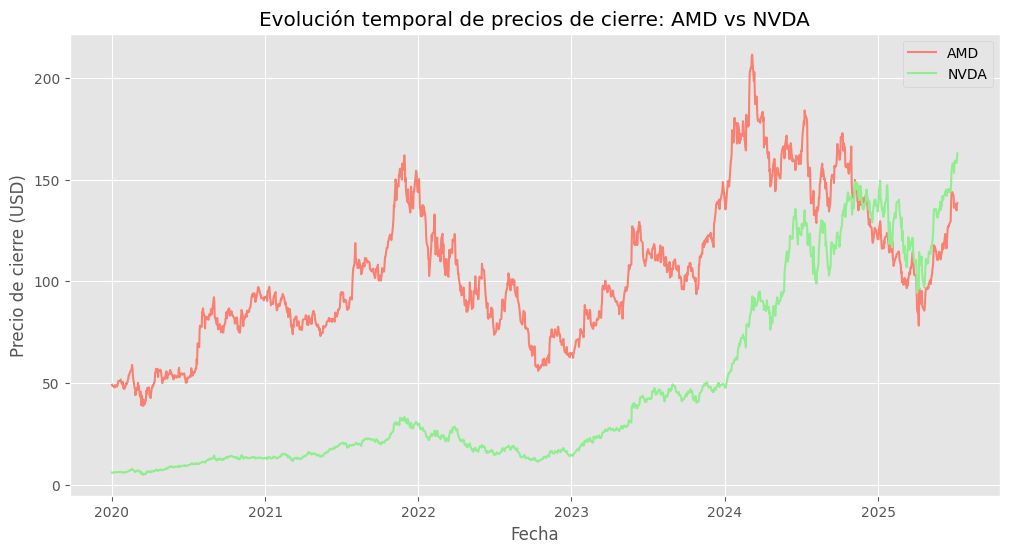

In [79]:
# Close prices comparison of AMD and NVDA
plt.figure(figsize=(12,6))
plt.plot(data['Close']['AMD'], label='AMD', color='salmon')
plt.plot(data['Close']['NVDA'], label='NVDA', color='lightgreen')
plt.title('Evolución temporal de precios de cierre: AMD vs NVDA')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.legend()
plt.show()

### Scatter Plot: Relationship Between Closing Prices
This plot helps analyze the relationship between the closing prices of AMD and NVDA for each date. Each point represents a day, with the AMD closing price on one axis and the NVDA closing price on the other. It is useful for identifying correlations, clusters, or outliers between the two assets.

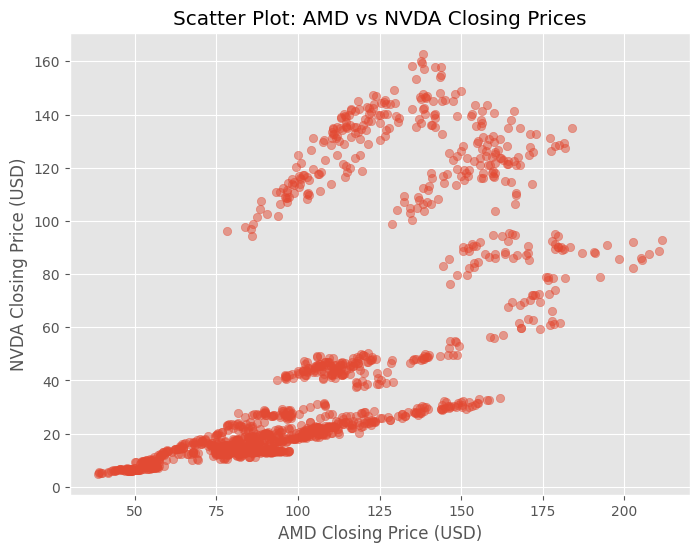

In [78]:
# Scatter plot: Relationship between AMD and NVDA closing prices
plt.figure(figsize=(8,6))
plt.scatter(data['Close']['AMD'], data['Close']['NVDA'], alpha=0.5)
plt.title('Scatter Plot: AMD vs NVDA Closing Prices')
plt.xlabel('AMD Closing Price (USD)')
plt.ylabel('NVDA Closing Price (USD)')
plt.grid(True)
plt.show()

### Histogram: Distribution of Closing Prices
This visualization shows how the closing prices of AMD and NVDA are distributed over time. It helps to identify the most common price ranges, outliers, and the overall spread for each asset.

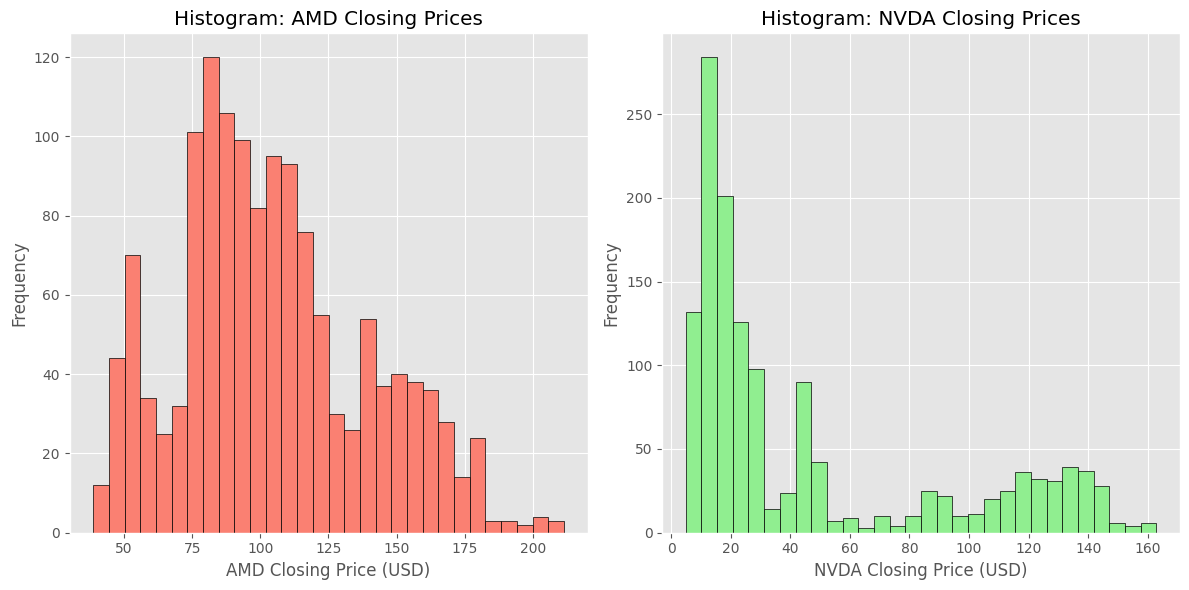

In [82]:
# Histogramas de la distribución de precios de cierre de AMD y NVDA
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(data['Close']['AMD'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram: AMD Closing Prices')
plt.xlabel('AMD Closing Price (USD)')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(data['Close']['NVDA'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram: NVDA Closing Prices')
plt.xlabel('NVDA Closing Price (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Scatter Plot: Relationship Between Closing Prices (SNS)

<Axes: xlabel='AMD', ylabel='NVDA'>

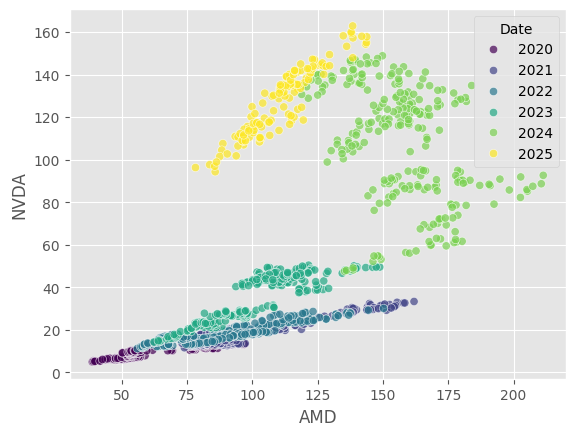

In [114]:
sns.scatterplot(
    x=data['Close']['AMD'],
    y=data['Close']['NVDA'],
    hue=data.index.year,
    palette='viridis',
    alpha=0.7
)


### Pairplot: Comparing Distributions and Relationships
A pairplot allows you to visualize the distributions and relationships between multiple variables. Here, it will help you compare the closing prices of AMD and NVDA, showing both their individual distributions and their joint relationship.

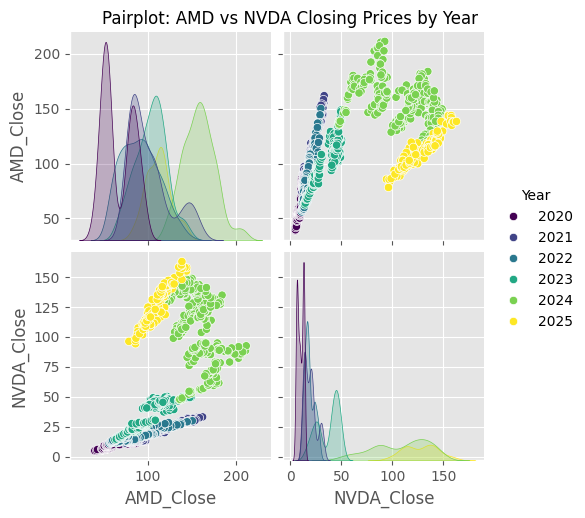

In [ ]:
"""
Create a DataFrame for pairplot
This is because we need simple columns for the pairplot not series.
""" 
df_pair = pd.DataFrame({
    'AMD_Close': data['Close']['AMD'],
    'NVDA_Close': data['Close']['NVDA'],
    'Year': data.index.year
})

sns.pairplot(df_pair, 
             vars=['AMD_Close', 'NVDA_Close'],
             hue='Year', 
             palette='viridis')
plt.suptitle('Pairplot: AMD vs NVDA Closing Prices by Year', y=1.02)
plt.show()

## Final Conclusions and Thesis

Based on the comprehensive exploratory data analysis of AMD and NVDA stock prices from 2020 to 2025, the following key insights and conclusions can be drawn:

### Key Findings:

1. **Strong Positive Correlation**: The scatter plots reveal a strong positive correlation between AMD and NVDA closing prices, indicating these semiconductor stocks tend to move together in the same direction.

2. **Temporal Evolution**: Both stocks show significant growth trajectories over the 5-year period, with NVDA demonstrating more dramatic price appreciation, especially during 2023-2024.

3. **Price Distribution**: The histograms show that both stocks have experienced wide price ranges, with NVDA showing higher volatility and reaching significantly higher price levels than AMD.

4. **Seasonal Patterns**: The color-coded scatter plots by year reveal distinct clustering patterns, suggesting that market conditions and external factors (like AI boom, chip shortage, etc.) affected both stocks similarly during specific time periods.

5. **Risk-Return Profile**: NVDA exhibits higher returns but also higher volatility compared to AMD, making it a higher risk-reward investment.

### Final Thesis:

**AMD and NVDA represent highly correlated investment opportunities within the semiconductor sector, with both stocks benefiting from similar market trends and technological advancements. However, they exhibit distinct risk-return profiles that cater to different investor preferences.**

**Investment Implications:**
- **Portfolio Diversification**: Due to their high correlation, holding both stocks may not provide significant diversification benefits within a portfolio.
- **Sector Exposure**: Both stocks serve as excellent proxies for semiconductor sector performance and AI/technology trend exposure.
- **Risk Management**: Investors seeking lower volatility should consider AMD, while those comfortable with higher risk for potentially higher returns might prefer NVDA.

**Recommendation**: For investors seeking semiconductor exposure, consider position sizing based on risk tolerance - NVDA for growth-oriented portfolios and AMD for more balanced approaches. The strong correlation suggests that fundamental sector analysis is more important than individual stock picking between these two companies.**